In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('pima_indians_diabetes_with_header.csv')
data = data.dropna()

# Linear Regression

1. Target y adalah klasifikasi biner (0,1); sedangkan linear regression untuk memprediksi angka kontinu (bukan mau prediksi angka tapi prediksi apakah org tsb 0 atau 1)
2. Linear regression akan mengeluarkan angka di luar 0 - 1
3. Asumsi error linear regression tidak cocok (normal), sedangkan error pada dataset bernoulli (0/1)
4. Tidak bisa menangani probabilitas secara baik, linear regression tidak punya fungsi sigmoid

# Logistic Regression

In [10]:
X = data.drop(columns=['Outcome'])
y = data['Outcome']

print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [11]:
X = X.to_numpy(dtype=float)  # pastikan numerik semua
y = y.to_numpy(dtype=int).reshape(-1)  # pastikan 1D array, bukan kolom dataframe

In [7]:
X_mean = X.mean(axis=0)   # Mean tiap kolom
X_std = X.std(axis=0)     # Std tiap kolom

X = (X - X_mean) / X_std

In [6]:
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [6]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [27]:
# Initialization
learning_rate = 0.01
n_iter = 4000
b = 0
w = np.zeros(X.shape[1])  #an array of weights for each X variables
print(w)

[0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
# Implement Logistic Regression functions with lambda
predict = lambda x, w, b: np.matmul(w,x.T) + b
sigmoid = lambda yhat: 1/(1+np.exp(-yhat))
loss = lambda y, sigmoid: -(y*np.log(sigmoid)+(1-y)*np.log(1-sigmoid)).mean()
dldw = lambda x, y, sigmoid: (np.reshape(sigmoid-y,(-1,1))*x).mean(axis = 0)
dldb = lambda y, sig: (sig-y).mean(axis = 0)
update = lambda a, g, lr: a-(g*lr)

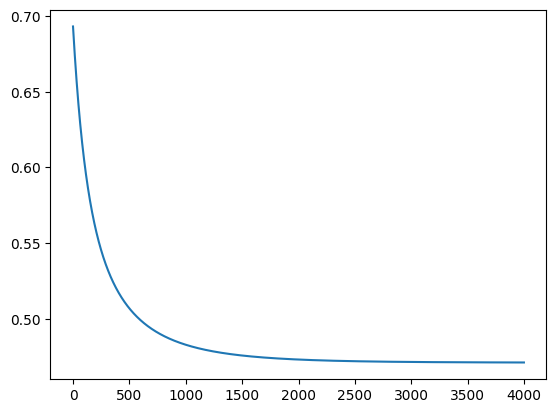

In [28]:
# Do Iteration 
losses = []
for i in range(n_iter):
    yhat = predict(X,w,b)
    sig = sigmoid(yhat)
    logloss = loss(y,sig)
    losses.append(logloss)
    grad_w = dldw(X,y,sig)
    grad_b = dldb(y,sig)
    w = update(w,grad_w,learning_rate)
    b = update(b,grad_b,learning_rate)

import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [34]:
from sklearn.metrics import classification_report

# Make Classification Report
yhat = predict(X,w,b)
sigy = sigmoid(yhat)
ypred = sigy >= 0.5
print(classification_report(y,ypred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.59      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.78       768



# KNN

In [ ]:
X_scaled = X

In [12]:
import numpy as np
import math

def classifyAPoint(points, p, k=3):
    '''
    KNN classifier from scratch (for multi-dimensional features)

    Parameters:
    - points: dict {0: [x1,x2,...], 1: [x1,x2,...]} with feature vectors as list
    - p: test point (1D array or list of features)
    - k: number of neighbors
    '''
    distances = []

    for group in points:
        for feature in points[group]:
            # Hitung Euclidean distance untuk vektor berdimensi banyak
            dist = np.linalg.norm(np.array(feature) - np.array(p))
            distances.append((dist, group))

    # Ambil k terdekat
    distances = sorted(distances)[:k]

    # Voting
    freq = {0: 0, 1: 0}
    for d in distances:
        freq[d[1]] += 1

    return 0 if freq[0] > freq[1] else 1


In [13]:
points = {0: [], 1: []}
for xi, yi in zip(X, y):
    points[yi].append(xi)

In [14]:
# Ambil sampel test (misalnya data ke-0)
test_point = X_scaled[1]
actual_label = y[1]

predicted_label = classifyAPoint(points, test_point, k=3)

print(f"Prediksi: {predicted_label}, Label Asli: {actual_label}")

Prediksi: 0, Label Asli: 0


In [15]:
correct = 0
for xi, yi in zip(X, y):
    pred = classifyAPoint(points, xi, k=3)
    if pred == yi:
        correct += 1

accuracy = correct / len(y)
print(f"Akurasi KNN (from scratch): {accuracy:.4f}")

Akurasi KNN (from scratch): 0.8516


In [20]:
split_idx = int(0.8 * len(X_scaled))
X_train, y_train = X_scaled[:split_idx], y[:split_idx]
X_test, y_test = X_scaled[split_idx:], y[split_idx:]

# Bangun ulang 'points' hanya dari data training
points = {0: [], 1: []}
for xi, yi in zip(X_train, y_train):
    points[yi].append(xi)

# Evaluasi akurasi di data test
correct = 0
for xi, yi in zip(X_test, y_test):
    pred = classifyAPoint(points, xi, k=31)
    if pred == yi:
        correct += 1

accuracy = correct / len(y_test)
print(f"Akurasi KNN (pakai test set): {accuracy:.4f}")

Akurasi KNN (pakai test set): 0.7662


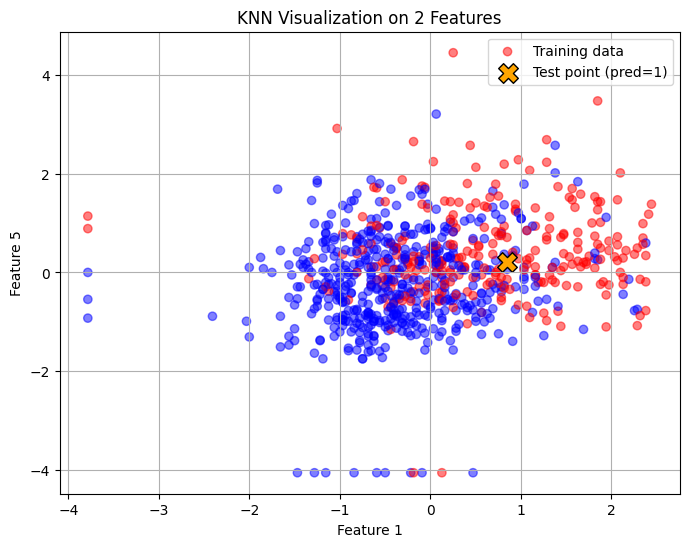

In [17]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk divisualisasikan (misalnya fitur 1 dan 5: Glucose dan BMI)
f1, f2 = 1, 5  # index fitur, karena array 0-based

# Ambil koordinat data dan label
x_coords = X[:, f1]
y_coords = X[:, f2]

# Buat warna berdasarkan label asli
colors = ['blue' if label == 0 else 'red' for label in y]

# Plot seluruh data
plt.figure(figsize=(8,6))
plt.scatter(x_coords, y_coords, c=colors, alpha=0.5, label='Training data')

# Plot 1 test point
test_index = 0
test_point = X[test_index]
pred_label = classifyAPoint(points, test_point, k=5)

plt.scatter(test_point[f1], test_point[f2],
            c='green' if pred_label == 0 else 'orange',
            edgecolors='black', s=200, marker='X',
            label=f'Test point (pred={pred_label})')

plt.xlabel(f'Feature {f1}')
plt.ylabel(f'Feature {f2}')
plt.title('KNN Visualization on 2 Features')
plt.legend()
plt.grid(True)
plt.show()
